# Question 1

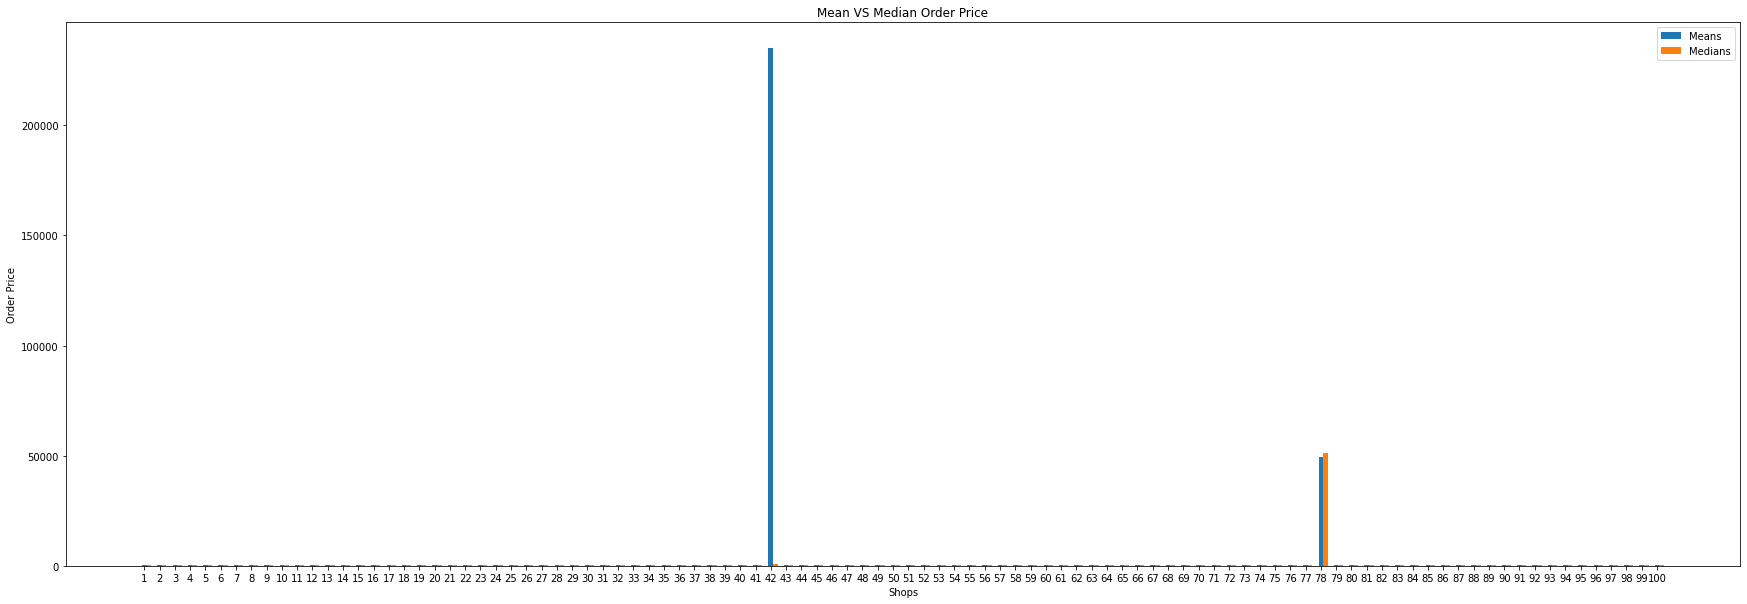

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvDf = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', delimiter=',')

orderMeans = {}
orderMedians = {}

for shopID in range(1, 101):
  shopOrders = csvDf.loc[csvDf['shop_id'] == shopID]['order_amount'].to_numpy()
  shopOrderMean = round(np.mean(shopOrders), 2)
  shopOrderMedian = round(np.median(shopOrders), 2)

  orderMeans[shopID] = shopOrderMean
  orderMedians[shopID] = shopOrderMedian

# -------- GRAPH --------
shopIDsList = list(orderMeans.keys())
orderMeansList = list(orderMeans.values())
orderMediansList = list(orderMedians.values())

plt.rcParams["figure.figsize"] = (30,10)
x_axis = np.arange(1, len(shopIDsList)+1)
width = 0.3

bar1 = plt.bar(x_axis - width/2, orderMeansList, width, label='Means', align='edge')
bar2 = plt.bar(x_axis + width/2, orderMediansList, width, label='Medians', align='edge')

plt.xticks(x_axis, shopIDsList)
plt.xlabel('Shops')
plt.ylabel('Order Price')
plt.title('Mean VS Median Order Price')
plt.legend()

plt.show()

# Answers

**a)**
Based on the graph above, we can see that stores 42 and 78 are most likely causing outliers through unusually high order values, therefore significantly increasing the raw mean value to 3145.128, making it an unreliable metric for the average order value (AOV). In order to get a more reliable estimate of the AOV, a better way to evaluate this data would be to use the median *order_amount* value instead, as it wouldn't be affected as much by an unusually large or small observation. Another would be to remove the outliers, and recalculate the mean. 

**b) / c)**
Below, the "Median", and "Mean without Outliers" were both calculated, with values of 284.0 and 293.7153735336489 respectively. These are much more reliable estimates of AOV, and are significantly different from the orignal AOV of 3145.128. The outlier removal on the order amounts were done using IQR. 


In [42]:
print("---------------------------------------")
order_amount_df = csvDf[['order_amount']]
print("Mean: ", float(order_amount_df.mean(axis=0)))
print("Median: ", float(order_amount_df.median(axis=0)))
Q1 = order_amount_df.quantile(0.25)
Q3 = order_amount_df.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", float(IQR))
df_out = order_amount_df[~((order_amount_df < (Q1 - 1.5 * IQR)) |(order_amount_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Mean without Outliers (Using IQR): ", float(df_out.mean(axis=0)))
print("---------------------------------------\n\n")

---------------------------------------
Mean:  3145.128
Median:  284.0
IQR:  227.0
Mean without Outliers (Using IQR):  293.7153735336489
---------------------------------------


